# Math 227C Problem Set 7

How does the size of the mitochondria in a cell depend on the size of the cell itself?

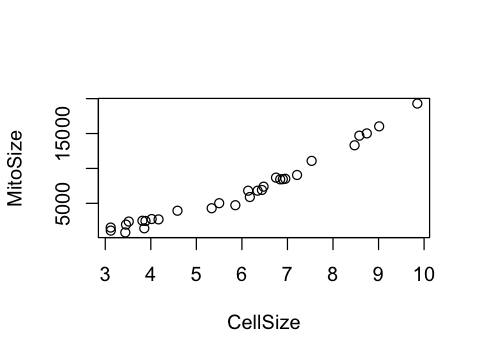

In [2]:
# plot settings
options(repr.plot.width=4, repr.plot.height=3)

# Simulate power-law data

N <- 30
alpha <- 2.3
Y0 <- 100
sigma <- 500

CellSize <- runif(N,3,10) # independent variable
eps <- rnorm(N,0,sigma) # residuals

MitoSize <- Y0*CellSize^alpha + eps

plot(CellSize,MitoSize)

## Part 1 

__(a)__ Use nonlinear least squares (nls) to estimate the parameter $\alpha$ from the simulated data.

In [4]:
modelMitoSize <- nls(MitoSize~b*CellSize^a, start=list(b=1,a=5))

error = abs(coef(modelMitoSize)[2] -alpha)
error

a 
0.0500592

Define the __error__ as $e=|\hat{\alpha}-\alpha|$ where $\hat{\alpha}$ is the estimate and $\alpha$ is the true value (which is known because this is simualted data). 

__(b)__ Write a function to execute the simulation and nls fitting, taking in the true model parameters $\alpha, y_0, \sigma$ and the sample size $N$. Plot the error in $\alpha$ estimation, $e$, as a function of the magnitude of the noise, $\sigma$, for a range of $\sigma=(100,2000)$. 

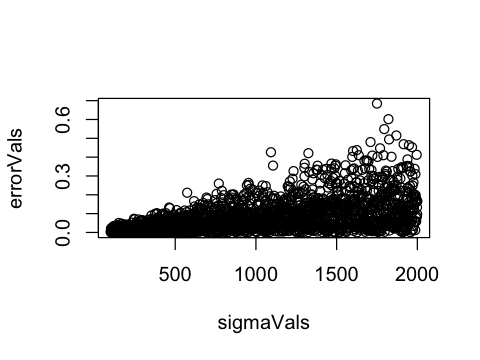

In [6]:
nlsSimFitError <- function (alpha, Y0, sigma, N)  {
    CellSize <- runif(N,3,10) # independent variable
    eps <- rnorm(N,0,sigma) # residuals

    MitoSize <- Y0*CellSize^alpha + eps
    
    nlsSimFit <- nls(MitoSize~Y0*CellSize^alpha, start=list(Y0=1, alpha=5))
    alphaFit <- as.numeric(coef(nlsSimFit)[2])
    error <- abs(alphaFit-alpha)
    return(error)
}

errorVals <- c()
for (sigma in 100:2000) {
    errorVals <- c(errorVals, nlsSimFitError(2.3, 100, sigma, 30))
}
sigmaVals <- 100:2000
plot(sigmaVals, errorVals)

## Part 2

__(a)__ Transform the simulated data to $lY = \mbox{log}(y)$ and $lX = \mbox{log}(x)$. Use linear regression model fit (lm) to estimate the parameter $\alpha$ from the simulated data.

In [9]:
logMitoSize <- log(MitoSize)
logCellSize <- log(CellSize)

linearModel <- lm(logMitoSize~logCellSize)
linearModel


Call:
lm(formula = logMitoSize ~ logCellSize)

Coefficients:
(Intercept)  logCellSize  
      4.455        2.375  


__(b)__ Write a function that executes the simulation, log-transforms the data, and performs linear regression fitting. Plot the error in $\alpha$ estimation, $e$, as a function of the magnitude of the noise, $\sigma$, for a range of $\sigma=(100,2000)$. 

Note you may need additional code to handle negative measurements.

__(c)__ Overplot the error in $\alpha$ from nls and the error from lm (as functions of $\sigma$). 

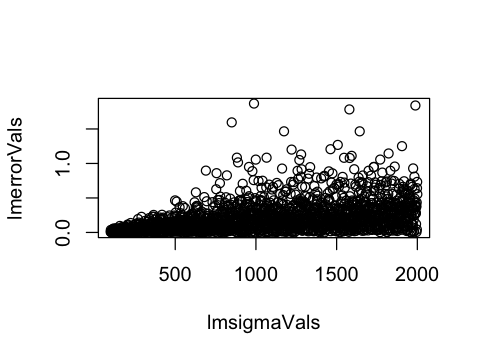

In [10]:
LogSimFitError <- function (alpha, Y0, sigma, N)  {
    CellSize <- runif(N,3,10) # independent variable
    eps <- rnorm(N,0,sigma) # residuals

    MitoSize <- Y0*CellSize^alpha + eps
    
    logMitoSize <- log(MitoSize[which(MitoSize>0)])
    logCellSize <- log(CellSize[which(MitoSize>0)])
    
    linearModel <- lm(logMitoSize~logCellSize)

    alphalmFit <- as.numeric(coef(linearModel)[2])
    lmerror <- abs(alphalmFit-alpha)
    return(lmerror)
}

lmerrorVals <- c()
for (sigma in 100:2000) {
    lmerrorVals <- c(lmerrorVals, LogSimFitError(2.3, 100, sigma, 30))
}
lmsigmaVals <- 100:2000
plot(lmsigmaVals, lmerrorVals)

## Part 3

In the above simulations, the independent variable $X$ was chosen from a uniform distribution.

__(a)__ Find a distribution of $X$ data that makes a very big difference between error from nls and error from lm.

__(b)__ Find a distribution of $X$ data that makes a very small difference between the error from nls and error from lm.

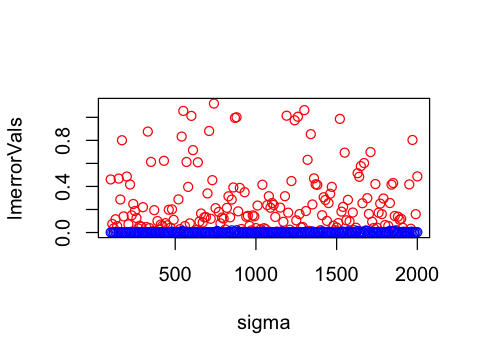

In [25]:
# Part a
nlsnormError <- function (alpha, Y0, sigma, N)  {
    CellSize <- rnorm(N, mean = 6.5, sd = 10) # independent variable
    eps <- rnorm(N,0,sigma) # residuals

    MitoSize <- Y0*CellSize^alpha + eps
    
    nlsSimFit <- nls(MitoSize~Y0*CellSize^alpha, start=list(Y0=1, alpha=5))
    alphaFit <- as.numeric(coef(nlsSimFit)[2])
    error <- abs(alphaFit-alpha)
    return(error)
}

LognormError <- function (alpha, Y0, sigma, N)  {
    CellSize <- rnorm(N, mean = 6.5, sd = 10) # independent variable
    eps <- rnorm(N,0,sigma) # residuals

    MitoSize <- Y0*CellSize^alpha + eps
    
    logMitoSize <- log(MitoSize[which(MitoSize>0)])
    logCellSize <- log(CellSize[which(MitoSize>0)])
    
    linearModel <- lm(logMitoSize~logCellSize)

    alphalmFit <- as.numeric(coef(linearModel)[2])
    lmerror <- abs(alphalmFit-alpha)
    return(lmerror)
}


sigma = seq(from=100, to=2000, by=10)

errorVals <- c()
for (s in sigma) {
    errorVals <- c(errorVals, nlsnormError(2.3, 100, sigma, 30))
    
}
lmerrorVals <- c()
for (s in sigma) {
    lmerrorVals <- c(lmerrorVals, LognormError(2.3, 100, sigma, 30))
}

plot(sigma, lmerrorVals, col = "red")
points(sigma, errorVals, col = "blue")

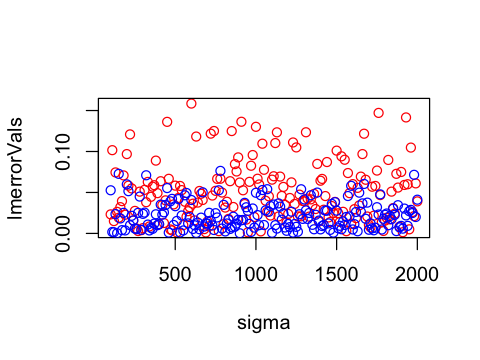

In [26]:
# Part b
CellSize <- runif(N,3,10) # independent variable
sigma = seq(from=100, to=2000, by=10)

errorVals <- c()
for (s in sigma) {
    errorVals <- c(errorVals, nlsSimFitError(2.3, 100, sigma, 30))
}
lmerrorVals <- c()
for (s in sigma) {
    lmerrorVals <- c(lmerrorVals, LogSimFitError(2.3, 100, sigma, 30))
}

plot(sigma, lmerrorVals, col = "red")
points(sigma, errorVals, col = "blue")